# Edgotyping Data Analyses

In [1]:
import pandas as pd 
import polars as pl
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Loading data

In [2]:
edgotyping_scores_df = pl.read_excel("../1_inputs/VarChAMP1percentEdgotypingScores_SeqConfirmed_ONLY.xlsx")
edgotyping_scores_df

ad_orf_id,ad_mut_id,db_orf_id,db_mut_id,condition_name,retest_batch,media_control,consensus_score,ad_symbol,symbol,aa_change,nt_change,ensembl_gene_id,collection,clinvar_clnsig_clean,gnomad_af,StarStatus,allele_0,final_score,final_score_wt,edgotype,edgotype_wt_2,seq_confirmation,seq_confirmation_wt,db_node_seq_confirmation,combo SWIM+pool,POOL only,SWIM only
i64,i64,i64,i64,str,str,bool,i64,str,str,str,str,str,str,str,f64,i64,str,i64,i64,str,str,i64,i64,i64,bool,bool,bool
145,0,145,200059,"""LWH1""","""VUSAPWT1B2""",false,2,"""PTS""","""PTS""","""Arg25Gln""","""74G>A""","""ENSG00000150787""","""CEGS2""","""1_Pathogenic""",6.9900e-7,2,"""PTS_Arg25Gln""",2,3,"""inconclusive""","""inconclusive""",1,1,1,true,true,true
145,0,145,200065,"""LWH1""","""VUSAPWT1B2""",false,2,"""PTS""","""PTS""","""Asp116Gly""","""347A>G""","""ENSG00000150787""","""CEGS2""","""3_Conflicting""",0.000004,1,"""PTS_Asp116Gly""",2,3,"""inconclusive""","""inconclusive""",1,1,1,true,true,true
152,0,5066,201830,"""LWH1""","""VUSAPWT1B2""",false,3,"""TRIM27""","""BAG3""","""Arg258Trp""","""772C>T""","""ENSG00000151929""","""CEGS2""","""2_Benign""",0.0004399,2,"""BAG3_Arg258Trp""",3,3,"""not perturbed""","""not perturbed""",1,1,1,true,true,true
152,0,5066,201831,"""LWH1""","""VUSAPWT1B2""",false,0,"""TRIM27""","""BAG3""","""Leu462Pro""","""1385T>C""","""ENSG00000151929""","""CEGS2""","""1_Pathogenic""",null,1,"""BAG3_Leu462Pro""",0,3,"""perturbed""","""perturbed""",1,1,2,true,true,true
152,0,5066,201832,"""LWH1""","""VUSAPWT1B2""",false,2,"""TRIM27""","""BAG3""","""Pro380Ser""","""1138C>T""","""ENSG00000151929""","""CEGS2""","""2_Benign""",0.000499,2,"""BAG3_Pro380Ser""",2,3,"""inconclusive""","""inconclusive""",1,1,1,true,true,true
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
100080183,0,71191,205704,"""LWH1""","""VUSAPWT6B1""",false,4,"""MEIS3""","""SUOX""","""Ala265Asp""","""794C>A""","""ENSG00000139531""","""CEGS2""","""4_VUS""",0.000042,1,"""SUOX_Ala265Asp""",4,4,"""not perturbed""","""not perturbed""",1,1,1,true,true,true
100080183,0,71191,205705,"""LWH1""","""VUSAPWT6B1""",false,4,"""MEIS3""","""SUOX""","""Gly530Asp""","""1589G>A""","""ENSG00000139531""","""CEGS2""","""1_Pathogenic""",6.8412e-7,null,"""SUOX_Gly530Asp""",4,4,"""not perturbed""","""not perturbed""",1,1,2,true,true,true
100080871,0,5066,201830,"""LWH1""","""VUSAPWT1B2""",false,4,"""PRDM6""","""BAG3""","""Arg258Trp""","""772C>T""","""ENSG00000151929""","""CEGS2""","""2_Benign""",0.0004399,2,"""BAG3_Arg258Trp""",4,3,"""inconclusive""","""inconclusive""",1,1,1,true,true,true


In [3]:
edgotyping_scores_alleles_df = pl.read_excel("../1_inputs/VarChampPillarEdgotypingScoresWithAlleleInfo_ToShare.xlsx")
edgotyping_scores_alleles_df#["seq_confirmed_final"].unique()

id,category,symbol,ccsb_mutation_id,ccsb_allele_id,db_orf_id,cv_allele_id,spdi,clinical_significance_simple,nt_change,aa_change,ensembl_protein_id,aa_change_ensp,ad_orf_id,ad_symbol,standard_batch,retest_pla,retest_pla_full,retest_pos,final_score,final_score_wt,final_score_wt_huri,edgotype,edgotype_wt_2,seq_confirmed_wt_ppi,seq_confirmed_allele_ppi,seq_confirmed_final
i64,str,str,str,str,i64,i64,str,str,str,str,str,str,i64,str,str,i64,str,str,str,i64,i64,str,str,i64,i64,i64
1,"""CAVA""","""CTCF""","""CCSBVarC010816""","""ALE00008908""",6173,208297,"""NC_000016.10:67636779:C:T""","""benign""","""1927C>T""","""Pro643Ser""","""ENSP00000264010.4""","""ENSP00000264010.4:p.Pro643Ser""",9637,"""TRAF2""","""HsVCplarAs1""",1,"""HsVCplarAs1_001""","""F09""","""2""",2,4,"""NA""","""not perturbed""",1,1,1
2,"""CAVA""","""CTCF""","""CCSBVarC010858""","""ALE00014571""",6173,799962,"""NC_000016.10:67626562:C:G""","""Pathogenic""","""1365C>G""","""His455Gln""","""ENSP00000264010.4""","""ENSP00000264010.4:p.His455Gln""",9637,"""TRAF2""","""HsVCplarAs1""",1,"""HsVCplarAs1_001""","""H09""","""2""",2,4,"""NA""","""not perturbed""",1,1,1
3,"""CAVA""","""CTCF""","""CCSBVarC010870""","""ALE00013232""",6173,260121,"""NC_000016.10:67621454:A:G""","""Pathogenic""","""1220A>G""","""Tyr407Cys""","""ENSP00000264010.4""","""ENSP00000264010.4:p.Tyr407Cys""",9637,"""TRAF2""","""HsVCplarAs1""",1,"""HsVCplarAs1_001""","""A10""","""2""",2,4,"""NA""","""not perturbed""",1,1,1
4,"""CAVA""","""CTCF""","""CCSBVarC010851""","""ALE00013946""",6173,422102,"""NC_000016.10:67616816:C:T""","""Pathogenic""","""1024C>T""","""Arg342Cys""","""ENSP00000264010.4""","""ENSP00000264010.4:p.Arg342Cys""",9637,"""TRAF2""","""HsVCplarAs1""",1,"""HsVCplarAs1_001""","""G09""","""AA""",2,4,"""NA""","""NA""",1,1,1
6,"""CAVA""","""CTCF""","""CCSBVarC010816""","""ALE00008908""",6173,208297,"""NC_000016.10:67636779:C:T""","""benign""","""1927C>T""","""Pro643Ser""","""ENSP00000264010.4""","""ENSP00000264010.4:p.Pro643Ser""",9016,"""ZMYM6""","""HsVCplarAs6""",1,"""HsVCplarAs6_001""","""C01""","""2""",2,1,"""NA""","""not perturbed""",1,1,1
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
11163,"""CAVA""","""RAF1""","""CCSBVarC008858""","""ALE00013778""",732,496336,"""NC_000003.12:12604195:A:C""","""Pathogenic""","""775T>G""","""Ser259Ala""","""ENSP00000251849.4""","""ENSP00000251849.4:p.Ser259Ala""",5462,"""NRAS""","""HsVCplarAs6""",25,"""HsVCplarAs6_025""","""B02""","""NULL""",null,0,"""NULL""","""NULL""",1,1,1
11164,"""CAVA""","""RAF1""","""CCSBVarC008860""","""ALE00011641""",732,28999,"""NC_000003.12:12584624:G:C""","""Pathogenic""","""1837C>G""","""Leu613Val""","""ENSP00000251849.4""","""ENSP00000251849.4:p.Leu613Val""",5462,"""NRAS""","""HsVCplarAs6""",25,"""HsVCplarAs6_025""","""C02""","""NULL""",null,0,"""NULL""","""NULL""",1,1,1
11165,"""CAVA""","""RAF1""","""CCSBVarC008862""","""ALE00012143""",732,49083,"""NC_000003.12:12599717:C:G""","""Pathogenic""","""1082G>C""","""Gly361Ala""","""ENSP00000251849.4""","""ENSP00000251849.4:p.Gly361Ala""",5462,"""NRAS""","""HsVCplarAs6""",25,"""HsVCplarAs6_025""","""D02""","""NULL""",null,0,"""NULL""","""NULL""",1,1,1


In [4]:
overlapped_cols = set(edgotyping_scores_df.columns).intersection(set(edgotyping_scores_alleles_df.columns))
combined_df = pl.concat([
    edgotyping_scores_df.select(pl.col(overlapped_cols)),
    edgotyping_scores_alleles_df.select(pl.col(overlapped_cols))
], how="vertical_relaxed").with_columns(
    pl.concat_str([pl.col("symbol"), pl.col("aa_change")], separator="_").alias("gene_variant")
)
print("Unique variants profiled:", combined_df.unique(subset="gene_variant"))
display(combined_df)

Unique variants profiled: shape: (968, 11)
┌───────────┬───────────┬────────────┬────────┬───┬────────────┬───────────┬───────────┬───────────┐
│ ad_orf_id ┆ nt_change ┆ final_scor ┆ symbol ┆ … ┆ final_scor ┆ ad_symbol ┆ edgotype_ ┆ gene_vari │
│ ---       ┆ ---       ┆ e_wt       ┆ ---    ┆   ┆ e          ┆ ---       ┆ wt_2      ┆ ant       │
│ i64       ┆ str       ┆ ---        ┆ str    ┆   ┆ ---        ┆ str       ┆ ---       ┆ ---       │
│           ┆           ┆ i64        ┆        ┆   ┆ str        ┆           ┆ str       ┆ str       │
╞═══════════╪═══════════╪════════════╪════════╪═══╪════════════╪═══════════╪═══════════╪═══════════╡
│ 5441      ┆ 848C>T    ┆ 2          ┆ TH     ┆ … ┆ 0          ┆ PUF       ┆ perturbed ┆ TH_Thr283 │
│           ┆           ┆            ┆        ┆   ┆            ┆           ┆           ┆ Met       │
│ 199       ┆ 1231T>C   ┆ 3          ┆ STXBP1 ┆ … ┆ 0          ┆ SYTL4     ┆ perturbed ┆ STXBP1_Ty │
│           ┆           ┆            ┆        ┆ 

ad_orf_id,nt_change,final_score_wt,symbol,db_orf_id,edgotype,aa_change,final_score,ad_symbol,edgotype_wt_2,gene_variant
i64,str,i64,str,i64,str,str,str,str,str,str
145,"""74G>A""",3,"""PTS""",145,"""inconclusive""","""Arg25Gln""","""2""","""PTS""","""inconclusive""","""PTS_Arg25Gln"""
145,"""347A>G""",3,"""PTS""",145,"""inconclusive""","""Asp116Gly""","""2""","""PTS""","""inconclusive""","""PTS_Asp116Gly"""
152,"""772C>T""",3,"""BAG3""",5066,"""not perturbed""","""Arg258Trp""","""3""","""TRIM27""","""not perturbed""","""BAG3_Arg258Trp"""
152,"""1385T>C""",3,"""BAG3""",5066,"""perturbed""","""Leu462Pro""","""0""","""TRIM27""","""perturbed""","""BAG3_Leu462Pro"""
152,"""1138C>T""",3,"""BAG3""",5066,"""inconclusive""","""Pro380Ser""","""2""","""TRIM27""","""inconclusive""","""BAG3_Pro380Ser"""
…,…,…,…,…,…,…,…,…,…,…
5462,"""775T>G""",null,"""RAF1""",732,"""NULL""","""Ser259Ala""","""NULL""","""NRAS""","""NULL""","""RAF1_Ser259Ala"""
5462,"""1837C>G""",null,"""RAF1""",732,"""NULL""","""Leu613Val""","""NULL""","""NRAS""","""NULL""","""RAF1_Leu613Val"""
5462,"""1082G>C""",null,"""RAF1""",732,"""NULL""","""Gly361Ala""","""NULL""","""NRAS""","""NULL""","""RAF1_Gly361Ala"""


In [5]:
edgotyping_scores_final = combined_df.with_columns(
    pl.col("edgotype_wt_2").replace(["NA", "NULL"], [None, None]).alias("edgotype_wt_final")
).drop_nulls(subset="edgotype_wt_final")
print("Unique variants with edgotyping data:", edgotyping_scores_final.unique(subset="gene_variant"))

Unique variants with edgotyping data: shape: (836, 12)
┌───────────┬───────────┬────────────┬────────┬───┬───────────┬────────────┬───────────┬───────────┐
│ ad_orf_id ┆ nt_change ┆ final_scor ┆ symbol ┆ … ┆ ad_symbol ┆ edgotype_w ┆ gene_vari ┆ edgotype_ │
│ ---       ┆ ---       ┆ e_wt       ┆ ---    ┆   ┆ ---       ┆ t_2        ┆ ant       ┆ wt_final  │
│ i64       ┆ str       ┆ ---        ┆ str    ┆   ┆ str       ┆ ---        ┆ ---       ┆ ---       │
│           ┆           ┆ i64        ┆        ┆   ┆           ┆ str        ┆ str       ┆ str       │
╞═══════════╪═══════════╪════════════╪════════╪═══╪═══════════╪════════════╪═══════════╪═══════════╡
│ 11229     ┆ 1393T>C   ┆ 3          ┆ KRT6A  ┆ … ┆ KIFC3     ┆ not        ┆ KRT6A_Tyr ┆ not       │
│           ┆           ┆            ┆        ┆   ┆           ┆ perturbed  ┆ 465His    ┆ perturbed │
│ 2654      ┆ 851C>G    ┆ 4          ┆ FBP1   ┆ … ┆ FBP1      ┆ perturbed  ┆ FBP1_Pro2 ┆ perturbed │
│           ┆           ┆           

In [6]:
# edgotyping_scores_final.write_csv("../3_outputs/edgotyping_final_combined_scores.csv")
# edgotyping_scores_final.write_csv("../../../3_integrated_assay_analyses/1_inputs/ppi/edgotyping_final_combined_scores.csv")

## 2. ClinVar Analysis

In [7]:
# process metadata
metadata = pl.DataFrame(pd.read_csv(f"../../../1_allele_collection/3_outputs/varchamp_alleles_clinvar_gnomad_dbnsfp_sc.tsv", sep="\t", low_memory=False))
mut_cols = ["mutation_id_rc4", "mutation_id_cegs2", "mutation_id_edgotyping3"]
id_vars = [col for col in metadata.columns if col not in mut_cols]
metadata = metadata.unpivot(index=id_vars, 
                            on=mut_cols,
                            variable_name="mutation_collection",
                            value_name="mut_id")

priority_col = ["orf_id", "mut_id", "symbol", "aa_change", "ensembl_gene_id", "clinvar_clnsig_clean", "gnomad_af", "StarStatus"]
metadata = metadata.select(priority_col).filter(~pl.col("mut_id").is_null()).with_columns(
    pl.col("mut_id").cast(pl.Int64).alias("mut_id"),
    pl.col("orf_id").cast(pl.Int64).alias("orf_id")
)
metadata

orf_id,mut_id,symbol,aa_change,ensembl_gene_id,clinvar_clnsig_clean,gnomad_af,StarStatus
i64,i64,str,str,str,str,f64,f64
3743,6896,"""LAMP2""","""Val310Ile""","""ENSG00000005893""","""1_Pathogenic""",null,2.0
71892,36336,"""TH""","""Thr245Pro""","""ENSG00000180176""","""4_VUS""",null,2.0
71892,36336,"""TH""","""Thr245Pro""","""ENSG00000180176""","""4_VUS""",null,2.0
6654,11957,"""NUDT6""","""Arg209Gln""","""ENSG00000170917""",null,null,null
71191,35087,"""SUOX""","""Gln396Arg""","""ENSG00000139531""",null,null,null
…,…,…,…,…,…,…,…
2713,940,"""MLH1""","""Pro640Ser""","""ENSG00000076242""","""1_Pathogenic""",null,3.0
13554,2231,"""GLYCTK""","""His490Tyr""","""ENSG00000168237""","""2_Benign""",0.000549,2.0
7154,1660,"""SLC22A5""","""Arg282Gln""","""ENSG00000197375""","""1_Pathogenic""",0.000015,2.0


In [8]:
edgotyping_scores_final_clinvar = edgotyping_scores_final.join(metadata, on=["symbol", "aa_change"], suffix='_meta')
edgotyping_scores_final_clinvar

ad_orf_id,nt_change,final_score_wt,symbol,db_orf_id,edgotype,aa_change,final_score,ad_symbol,edgotype_wt_2,gene_variant,edgotype_wt_final,orf_id,mut_id,ensembl_gene_id,clinvar_clnsig_clean,gnomad_af,StarStatus
i64,str,i64,str,i64,str,str,str,str,str,str,str,i64,i64,str,str,f64,f64
5441,"""733A>C""",2,"""TH""",71892,"""NA""","""Thr245Pro""","""2""","""PUF""","""not perturbed""","""TH_Thr245Pro""","""not perturbed""",71892,36336,"""ENSG00000180176""","""4_VUS""",null,2.0
71892,"""733A>C""",4,"""TH""",71892,"""not perturbed""","""Thr245Pro""","""4""","""TH""","""not perturbed""","""TH_Thr245Pro""","""not perturbed""",71892,36336,"""ENSG00000180176""","""4_VUS""",null,2.0
5441,"""733A>C""",2,"""TH""",71892,"""NA""","""Thr245Pro""","""2""","""PUF""","""not perturbed""","""TH_Thr245Pro""","""not perturbed""",71892,36336,"""ENSG00000180176""","""4_VUS""",null,2.0
71892,"""733A>C""",4,"""TH""",71892,"""not perturbed""","""Thr245Pro""","""4""","""TH""","""not perturbed""","""TH_Thr245Pro""","""not perturbed""",71892,36336,"""ENSG00000180176""","""4_VUS""",null,2.0
439,"""334G>A""",3,"""LITAF""",52920,"""not perturbed""","""Gly112Ser""","""3""","""RNF208""","""not perturbed""","""LITAF_Gly112Ser""","""not perturbed""",52920,25126,"""ENSG00000189067""","""1_Pathogenic""",null,2.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
730,"""241G>A""",3,"""LITAF""",52920,"""not perturbed""","""Val81Met""","""3""","""HPCAL1""","""not perturbed""","""LITAF_Val81Met""","""not perturbed""",52920,2682,"""ENSG00000189067""","""2_Benign""",null,2.0
1235,"""241G>A""",3,"""LITAF""",52920,"""not perturbed""","""Val81Met""","""3""","""HPCAL4""","""not perturbed""","""LITAF_Val81Met""","""not perturbed""",52920,2682,"""ENSG00000189067""","""2_Benign""",null,2.0
10064,"""241G>A""",3,"""LITAF""",52920,"""not perturbed""","""Val81Met""","""3""","""KCNIP4""","""not perturbed""","""LITAF_Val81Met""","""not perturbed""",52920,2682,"""ENSG00000189067""","""2_Benign""",null,2.0


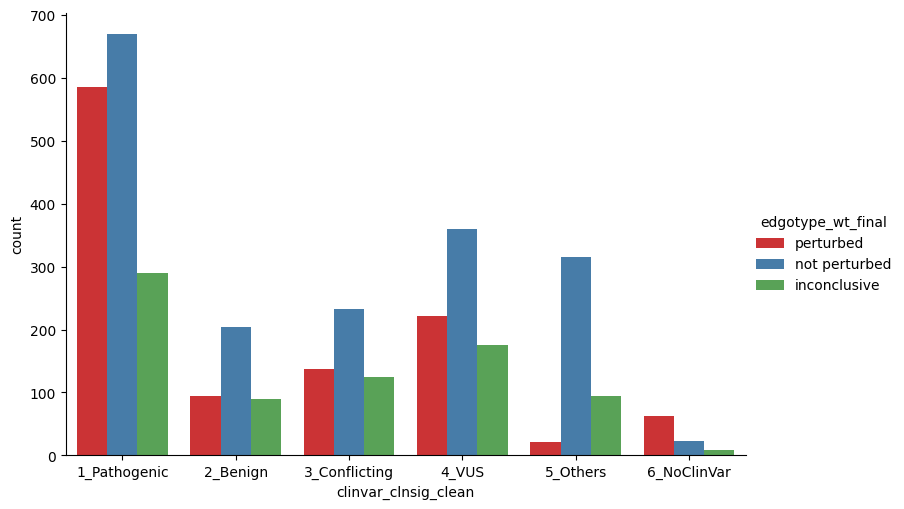

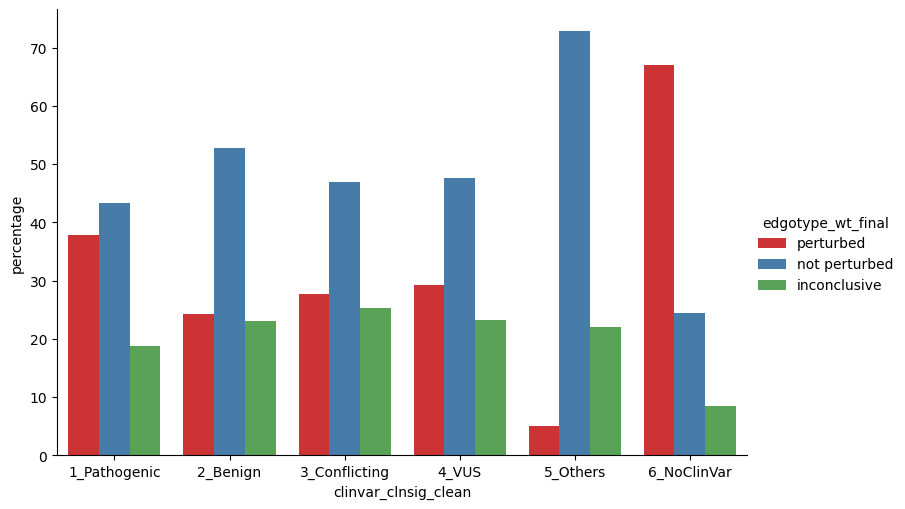

In [9]:
edgotyping_clinvar_sum = (
    edgotyping_scores_final_clinvar
      .group_by(["clinvar_clnsig_clean", "edgotype_wt_final"])
      .len()
      .sort(by="clinvar_clnsig_clean")
      .rename({"len": "count"})
).with_columns(
    pl.col("clinvar_clnsig_clean").fill_null("6_NoClinVar")).to_pandas()

# Compute the total count PER clinvar_clnsig_clean (as a Series aligned to df.index):
totals = edgotyping_clinvar_sum.groupby("clinvar_clnsig_clean")["count"].transform("sum")

# Now compute percentage = count ÷ total_for_that_clinvar × 100
edgotyping_clinvar_sum["percentage"] = edgotyping_clinvar_sum["count"] / totals * 100

g = sns.catplot(data=edgotyping_clinvar_sum.sort_values(by="clinvar_clnsig_clean"),
                x="clinvar_clnsig_clean", y="count", hue="edgotype_wt_final", kind="bar", aspect=1.5, 
                palette="Set1", hue_order=["perturbed","not perturbed","inconclusive"])

g = sns.catplot(data=edgotyping_clinvar_sum.sort_values(by="clinvar_clnsig_clean"),
                x="clinvar_clnsig_clean", y="percentage", hue="edgotype_wt_final", kind="bar", aspect=1.5, 
                palette="Set1", hue_order=["perturbed","not perturbed","inconclusive"])